# Red Wine Quality

# Exploratory Data Analysis

Importing Libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
from scipy.stats import norm 
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [2]:
df=pd.read_csv('Red_Wine.csv')

First 10 entries

In [3]:
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [4]:
df.shape

(1599, 12)

The dataset contains 1599 rows and 12 columns.

Datatype of the features

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Column Names

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Information about the features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Missing Values

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Heatmap of the null values.

<AxesSubplot:>

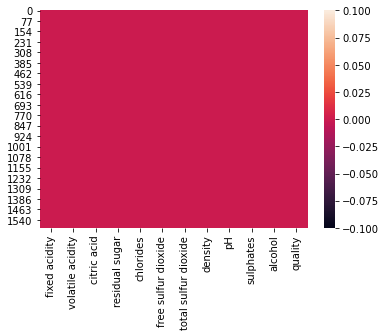

In [9]:
sns.heatmap(df.isnull())

# Statistical Calculation

In [10]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

There is large difference in 75 percentile and max in residual sugar, free sulfur dioxide, total sulfur dioxide.
This suggests that there are extreme outliers present in tese three columns.

Heatmap of statistical data

<AxesSubplot:>

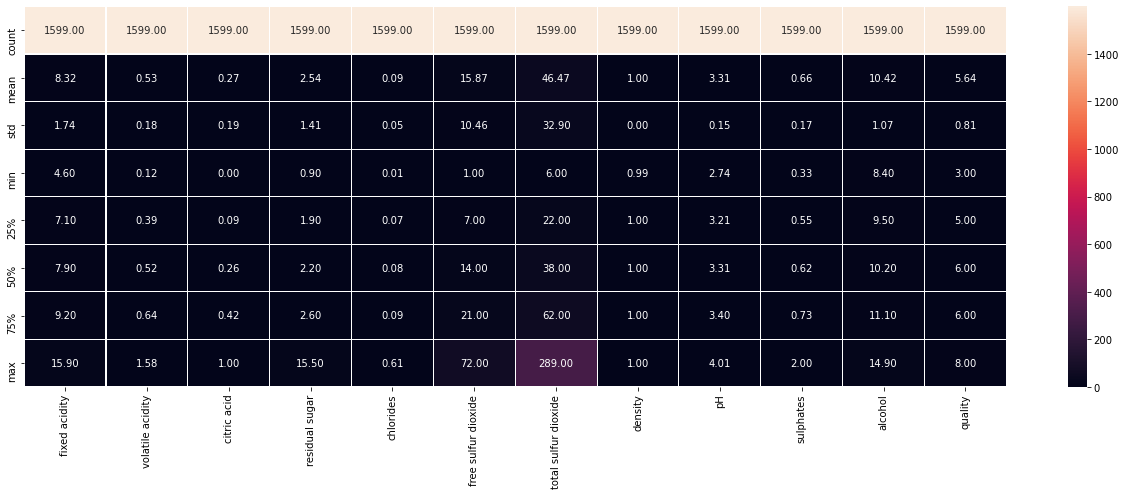

In [11]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidths=0.1,linecolor='white')

Unique Values in target variable

In [12]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [13]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

countplot of column 'quality'

<AxesSubplot:xlabel='quality', ylabel='count'>

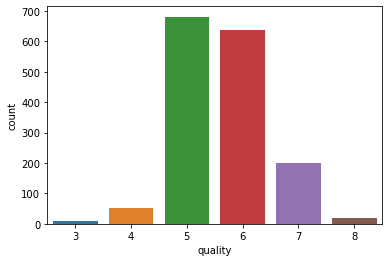

In [14]:
sns.countplot(x='quality',data=df)

countplot clearly shows counts at 5 and 6 to be larger which indicate not so good wine.

# Checking Correlation

In [15]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

correlation heatmap

<AxesSubplot:>

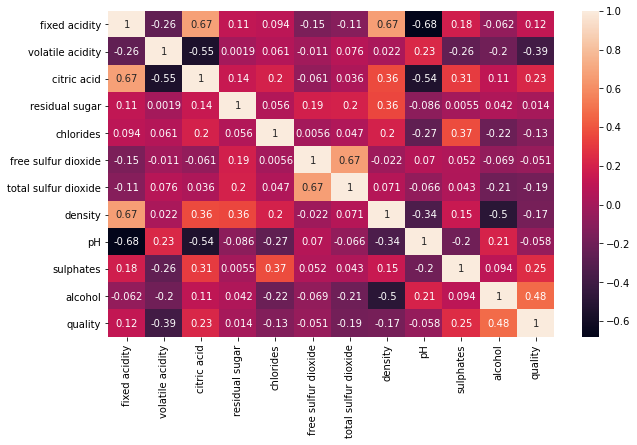

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

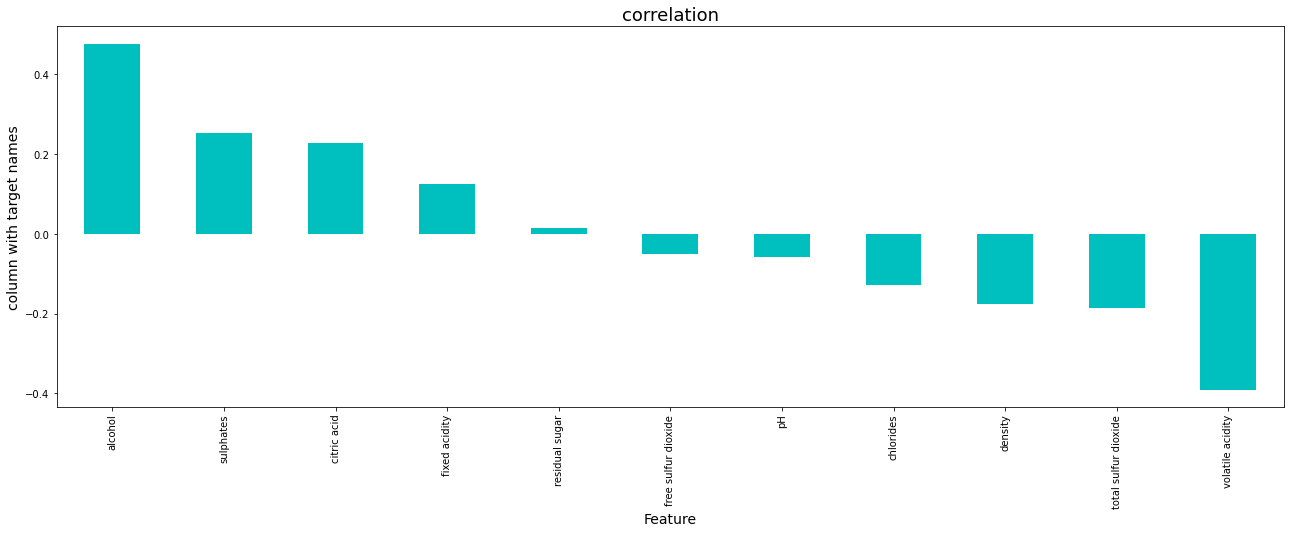

In [17]:
plt.figure(figsize=(22,7))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color="c")
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

'alcohol','sulphates','citric acid','fixed acidity' and 'residual sugar' show positive correlation with column 'quality' others
are negatively correlated.

# Bivariate Analysis

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

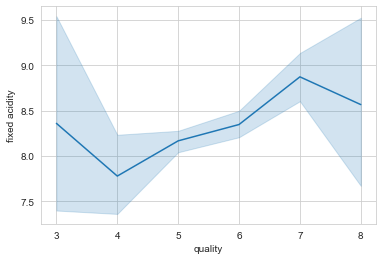

In [18]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="fixed acidity")

Composition of fixed acidity is at peak at quality score 7

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

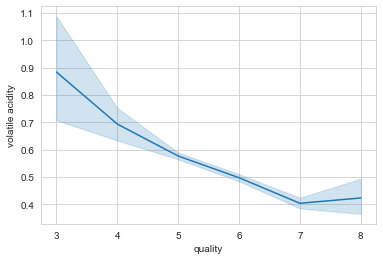

In [19]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="volatile acidity")

As the quality score increases volatile acidity composition decreases

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

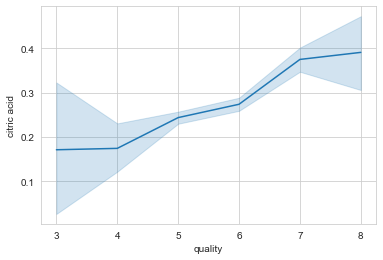

In [20]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="citric acid")

As the quality score increases citric acid composition increases

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

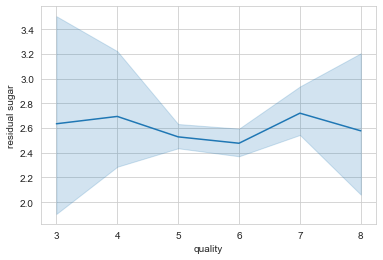

In [21]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="residual sugar")

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

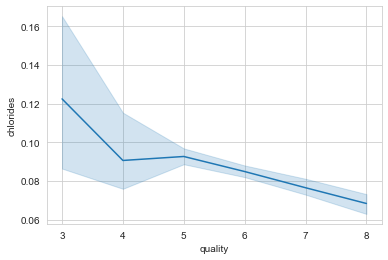

In [22]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="chlorides")

As quality increases composition of chlorides decreases.

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

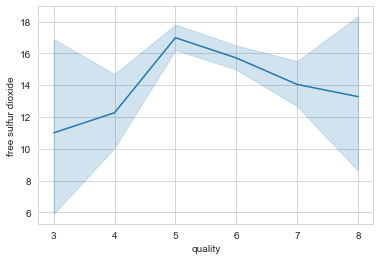

In [23]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="free sulfur dioxide")

free sulfur dioxide increases till 5 and then decreses as the quality increases

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

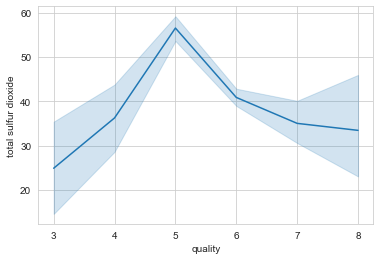

In [24]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="total sulfur dioxide")

total sulfur dioxide composition is at peak at 5 and then decreases as the quality increases

<AxesSubplot:xlabel='quality', ylabel='density'>

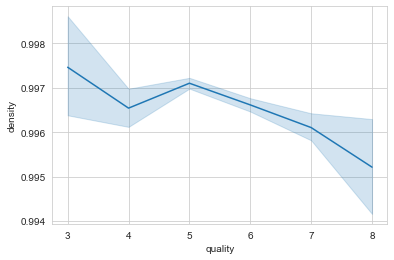

In [25]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="density")

After quality score 5 density decreses as quality increases

<AxesSubplot:xlabel='quality', ylabel='pH'>

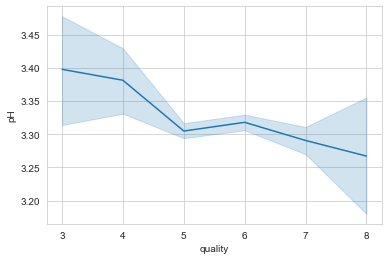

In [26]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="pH")

pH decreases as quality increases except at 6

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

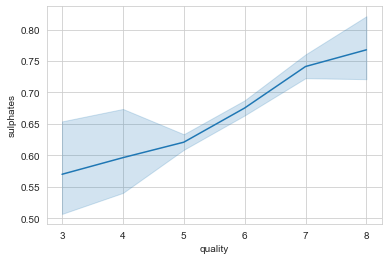

In [27]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="sulphates")

composition of sulphates increases as the quality increases.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

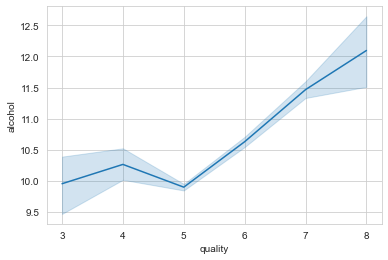

In [28]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="alcohol")

composition of alcohol drastically increases after score 5

# Box Plots showing outliers

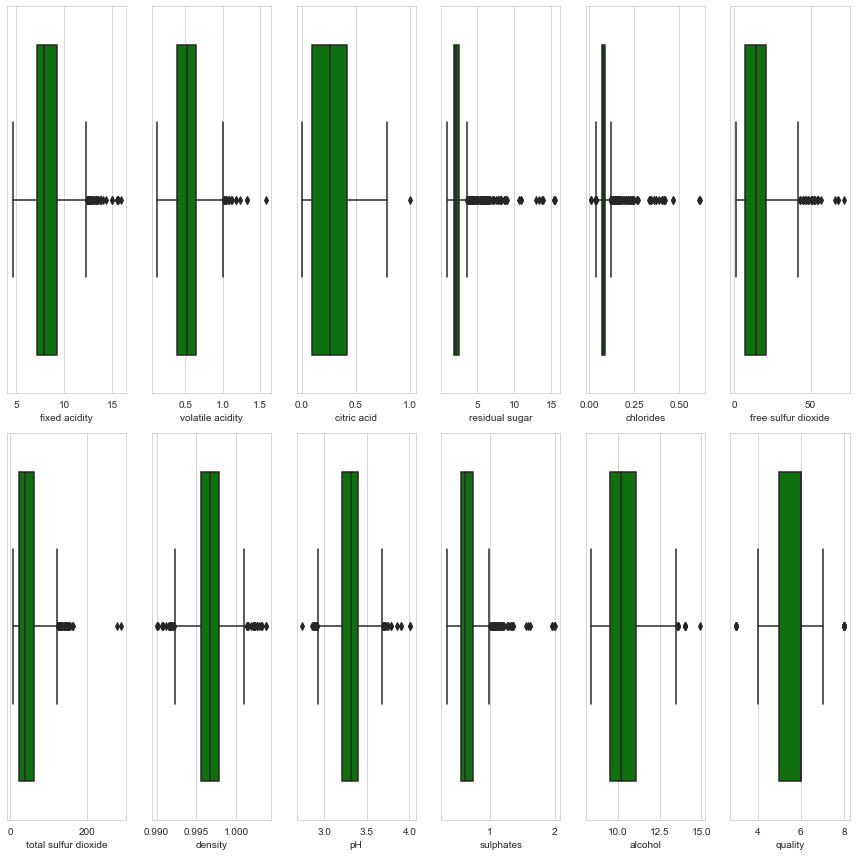

In [29]:
collist=df.columns.values
ncol=6
nrows=2
plt.figure(figsize=(12,2*ncol))
for i in range(0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Distribution Plot

Skewness: 0.982751


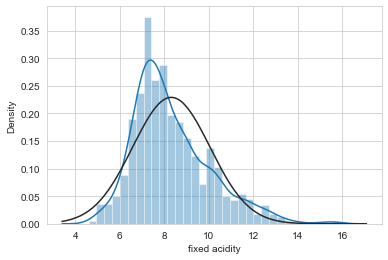

<Figure size 432x288 with 0 Axes>

In [30]:
sns.distplot(df['fixed acidity'],fit=norm)
fig=plt.figure()
print("Skewness: %f" % df['fixed acidity'].skew());

'fixed acidity' is positively skewed.

Skewness: 0.671593


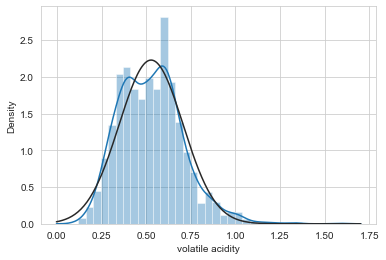

<Figure size 432x288 with 0 Axes>

In [31]:
sns.distplot(df['volatile acidity'],fit=norm)
fig=plt.figure()
print("Skewness: %f" % df['volatile acidity'].skew());

volatile acidity is nearly normally distributed (Bimodal)

Skewness: 0.318337


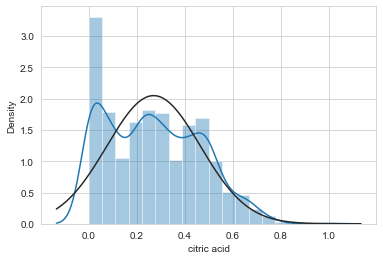

<Figure size 432x288 with 0 Axes>

In [32]:
sns.distplot(df['citric acid'],fit=norm)
fig=plt.figure()
print("Skewness: %f" % df['citric acid'].skew());

citric acid has Multimodal distribution

Skewness: 4.540655


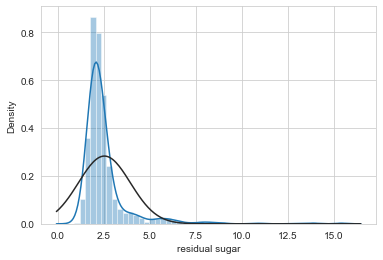

<Figure size 432x288 with 0 Axes>

In [33]:
sns.distplot(df['residual sugar'],fit=norm)
fig=plt.figure()
print("Skewness: %f" % df['residual sugar'].skew());

residual sugar is highly positive skewed

Skewness: 0.982751


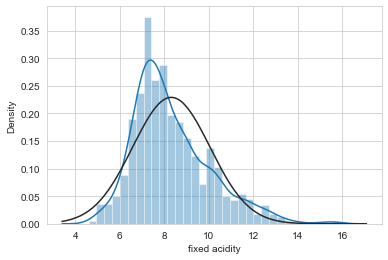

<Figure size 432x288 with 0 Axes>

In [34]:
sns.distplot(df['fixed acidity'],fit=norm)
fig=plt.figure()
print("Skewness: %f" % df['fixed acidity'].skew());

fixed acidity is slightly positively skewed

Skewness: 5.680347


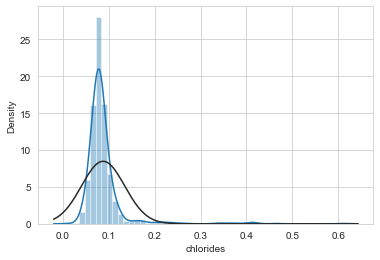

<Figure size 432x288 with 0 Axes>

In [35]:
sns.distplot(df['chlorides'],fit=norm)
fig=plt.figure()
print("Skewness: %f" % df['chlorides'].skew());

chlorides is highly positively skewed

Skewness: 1.250567


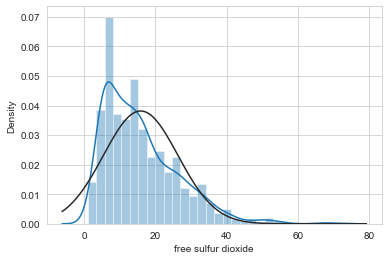

<Figure size 432x288 with 0 Axes>

In [36]:
sns.distplot(df['free sulfur dioxide'],fit=norm)
fig=plt.figure()
print("Skewness: %f" % df['free sulfur dioxide'].skew());

free sulphur dioxide is positively skewed.

Skewness: 1.515531


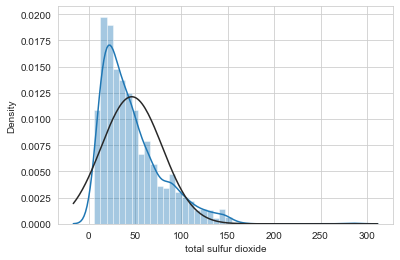

<Figure size 432x288 with 0 Axes>

In [37]:
sns.distplot(df['total sulfur dioxide'],fit=norm)
fig=plt.figure()
print("Skewness: %f" % df['total sulfur dioxide'].skew());

total sulfur dioxide is positively skewed.

Skewness: 0.071288


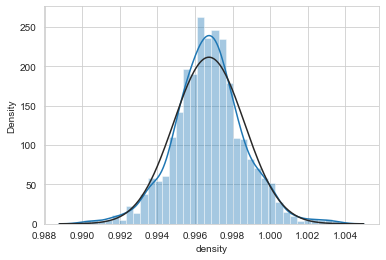

<Figure size 432x288 with 0 Axes>

In [38]:
sns.distplot(df['density'],fit=norm)
fig=plt.figure()
print("Skewness: %f" % df['density'].skew());

density is normally distributed

Skewness: 0.193683


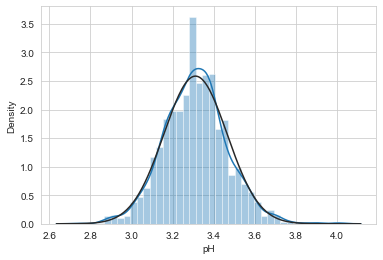

<Figure size 432x288 with 0 Axes>

In [39]:
sns.distplot(df['pH'],fit=norm)
fig=plt.figure()
print("Skewness: %f" % df['pH'].skew());

pH is normally distributed

Skewness: 2.428672


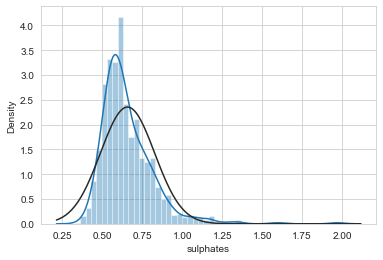

<Figure size 432x288 with 0 Axes>

In [40]:
sns.distplot(df['sulphates'],fit=norm)
fig=plt.figure()
print("Skewness: %f" % df['sulphates'].skew());

sulphates is positively skewed

Skewness: 0.860829


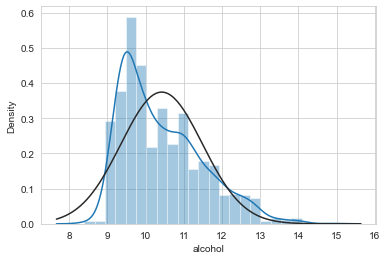

<Figure size 432x288 with 0 Axes>

In [41]:
sns.distplot(df['alcohol'],fit=norm)
fig=plt.figure()
print("Skewness: %f" % df['alcohol'].skew());

alcohol is slightly positively skewed

Skewness: 0.217802


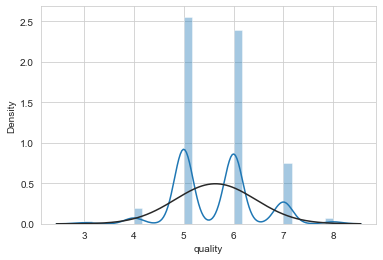

<Figure size 432x288 with 0 Axes>

In [42]:
sns.distplot(df['quality'],fit=norm)
fig=plt.figure()
print("Skewness: %f" % df['quality'].skew());

quality has multimodal normal distribution

# Categorical Division

In [43]:
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
#from 2 to 6.5 it is considered as bad and 6.5 to 8 as good

In [44]:
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  
3      9.8     bad  
4      9.4     bad  
5      9.4     bad  
6      9.4     bad  
7     10.0    good  
8      9.5    good  
9     10.5     bad

# Multivariate Analysis

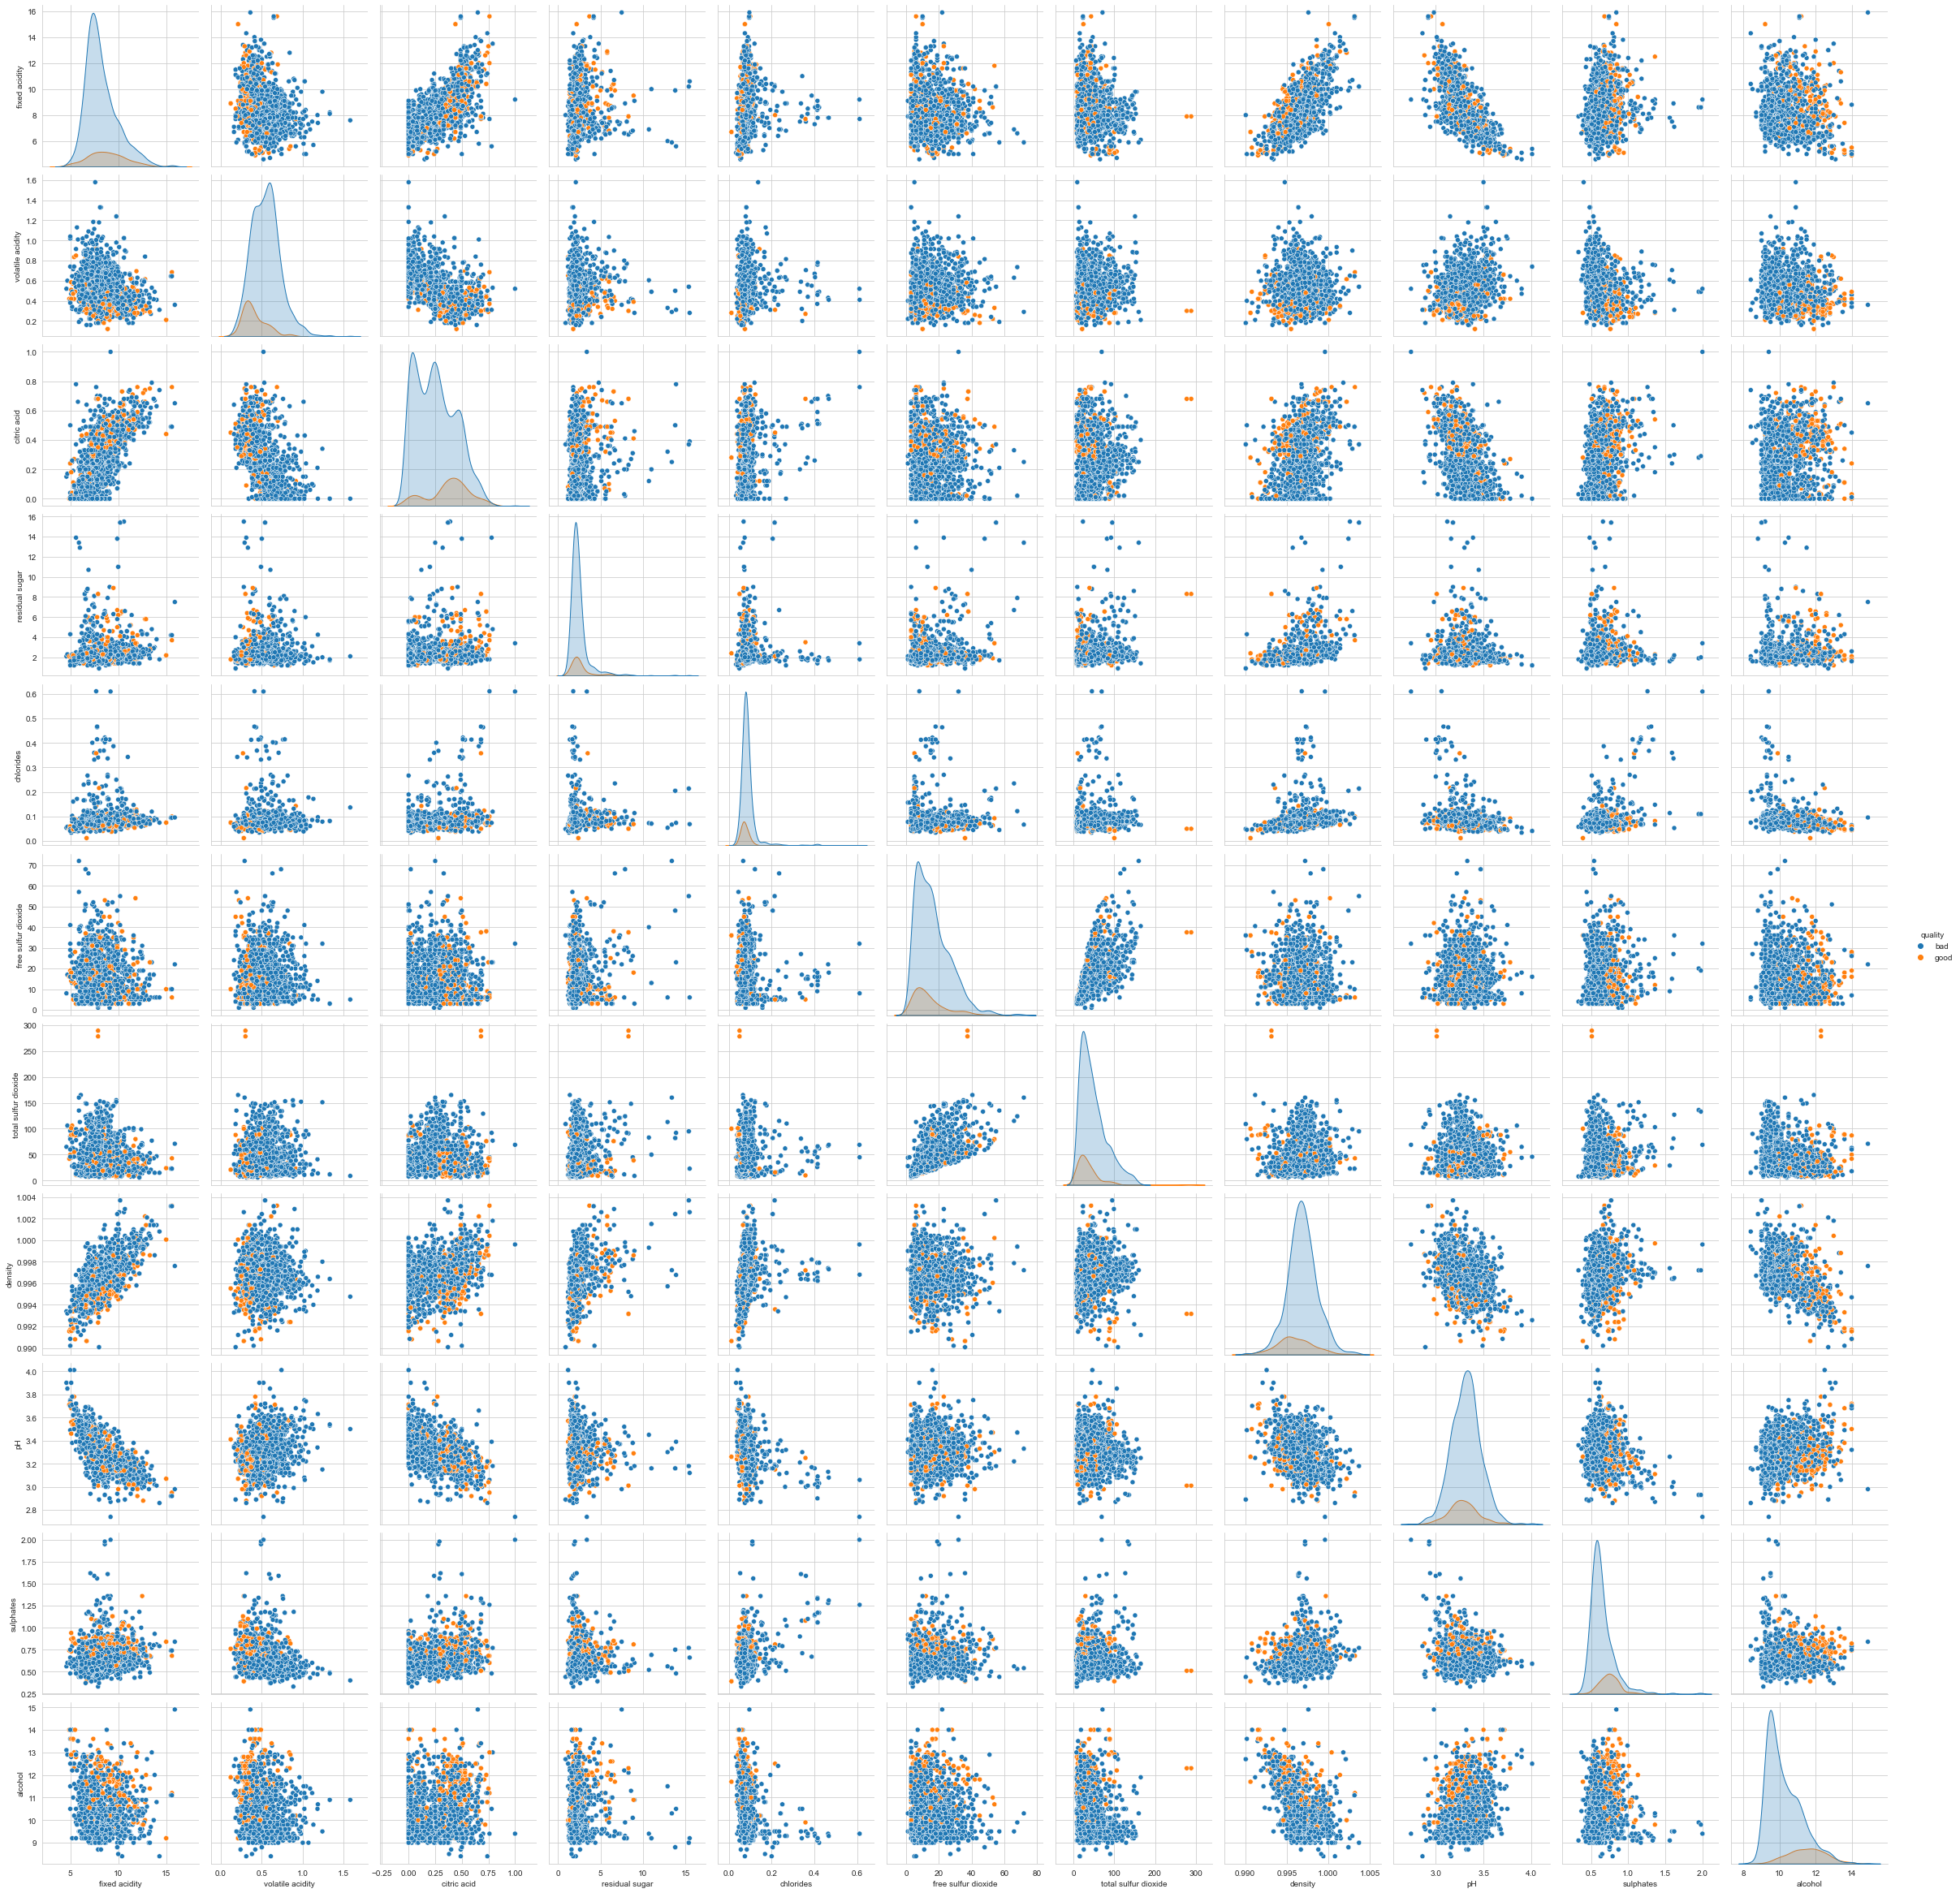

In [45]:
sns.pairplot(df,hue="quality",size=3)

# Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['quality']=LE.fit_transform(df['quality'])

In [47]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

# Class Imbalance

<AxesSubplot:xlabel='quality', ylabel='count'>

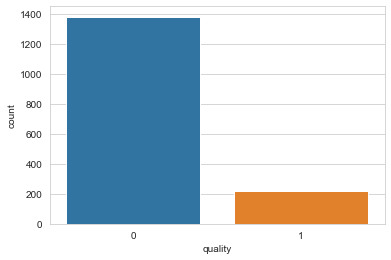

In [48]:
sns.countplot(df['quality'])

countplot shows clear imbalance of class quality.

# Outlier Removal

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.39625599],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.39625599],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.39625599],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.39625599],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.39625599],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.39625599]])

In [50]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
        695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
        889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

In [51]:
z[13][9]

5.32210116796055

In [52]:
z[1589][3]

3.732701384742145

In [53]:
df_new=df[(z<3).all(axis=1)]
df_new

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        0  
4         9.4        0  
...       ...      ...  
1594     10.5        0  
1595     11.2        0  
1596     11.0        0  
1597     10.2        0  
1598     11.0        0  

[1458 rows x 12 columns]

In [54]:
df.shape

(1599, 12)

In [55]:
df_new.shape

(1458, 12)

141 rows were removed.

# Separating x(Independent) and y(target) variable.

In [56]:
x=df.drop('quality',axis=1)
y=df['quality']

In [57]:
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [58]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int32

# Balancing class

In [59]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)
y_over.value_counts()

1    1382
0    1382
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

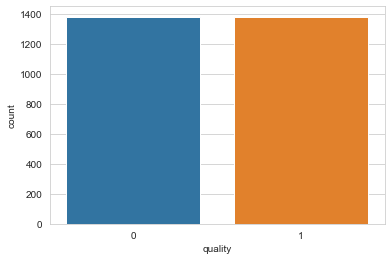

In [60]:
sns.countplot(y_over)

In [61]:
x_over.skew()

fixed acidity           0.717522
volatile acidity        0.923760
citric acid            -0.014498
residual sugar          4.000965
chlorides               6.246360
free sulfur dioxide     1.274033
total sulfur dioxide    2.172223
density                 0.177242
pH                      0.277919
sulphates               1.641712
alcohol                 0.236620
dtype: float64

Will not remove skewness as we are getting NaN values by multiple methods.

# Scaling

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_over=pd.DataFrame(scaler.fit_transform(x_over),columns=x_over.columns)
x_over.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  
0  0.153846  
1  0.215385  
2  0.215385  
3  0.215385  
4  0.153846

# Finding the best random state

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ",maxAccu,"on Random State: ",maxRS)

Best accuracy is:  0.8518072289156626 on Random State:  31


# Train Test Split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=31)

# Model Selection

In [80]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
pred=lg.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8518072289156626
[[336  77]
 [ 46 371]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       413
           1       0.83      0.89      0.86       417

    accuracy                           0.85       830
   macro avg       0.85      0.85      0.85       830
weighted avg       0.85      0.85      0.85       830



In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

accuracy_score:
0.8903614457831325
[[327  86]
 [  5 412]]
              precision    recall  f1-score   support

           0       0.98      0.79      0.88       413
           1       0.83      0.99      0.90       417

    accuracy                           0.89       830
   macro avg       0.91      0.89      0.89       830
weighted avg       0.91      0.89      0.89       830



In [82]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

accuracy_score:
0.880722891566265
[[352  61]
 [ 38 379]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       413
           1       0.86      0.91      0.88       417

    accuracy                           0.88       830
   macro avg       0.88      0.88      0.88       830
weighted avg       0.88      0.88      0.88       830



# Ensemble technique

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred=rf.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.9409638554216867
[[376  37]
 [ 12 405]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       413
           1       0.92      0.97      0.94       417

    accuracy                           0.94       830
   macro avg       0.94      0.94      0.94       830
weighted avg       0.94      0.94      0.94       830



In [84]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
pred=ad.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8855421686746988
[[360  53]
 [ 42 375]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       413
           1       0.88      0.90      0.89       417

    accuracy                           0.89       830
   macro avg       0.89      0.89      0.89       830
weighted avg       0.89      0.89      0.89       830



# Cross Validation

In [85]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())

[0.871875   0.8625     0.88125    0.85       0.87147335]
0.867419670846395


In [86]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())

[0.859375   0.8125     0.871875   0.803125   0.87774295]
0.8449235893416928


In [87]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())

[0.853125   0.753125   0.875      0.746875   0.79310345]
0.8042456896551725


In [88]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
scorerf=score.mean()

[0.878125   0.85       0.878125   0.85625    0.87774295]
0.8680485893416929


In [89]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())

[0.884375   0.8375     0.88125    0.84375    0.86206897]
0.8617887931034482


# As the least difference between accuracy and cross validation score is for Logistic Regression it is our best model.

# Hyperparameter Tuning

In [90]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
GCV=GridSearchCV(LogisticRegression(),parameter,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'C': 1000, 'penalty': 'l2'}

In [91]:
Final_mod=LogisticRegression(C=1000,penalty='l2')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

84.33734939759037


# AUC-ROC CURVE

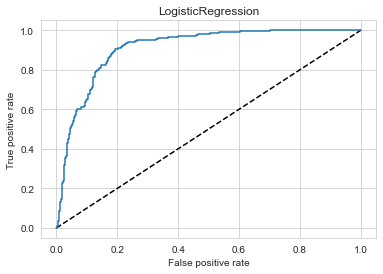

0.851623785717189

In [92]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LogisticRegression')
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score

# Saving the model

In [93]:
import joblib
joblib.dump(lg,'lgfile.obj')

['lgfile.obj']